In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)


# the data, split between train and test sets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = keras.utils.normalize(x_train, axis = 1)
x_test = keras.utils.normalize(x_test, axis = 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# Define our model
model = keras.Sequential()

model.add(keras.Input(shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation="softmax"))

model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
# trying a different architecture

# model = keras.Sequential()

# model.add(keras.Input(shape=input_shape))
# model.add(layers.Conv2D(1, kernel_size=(3, 3), activation="relu"))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(48, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(80, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(96, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(112, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(144, kernel_size=(3, 3), activation="relu"))
# model.add(layers.Conv2D(160, kernel_size=(3, 3), activation="relu"))
# # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation="softmax"))

# model.build(input_shape)
# model.summary()

In [ ]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", f1_metric])

history_adam = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [6]:
# model.save("./models/cnn_mnist")

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03476301208138466
Test accuracy: 0.9894000291824341


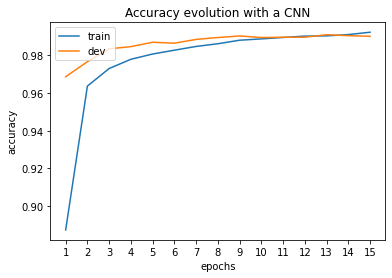

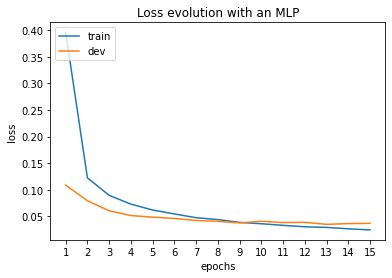

In [8]:
epochs = [i for i in range(1,16)]
epochs_ticks = [i for i in range(1,16)]
# Accuracy
fig1, ax1 = plt.subplots()
ax1.set_xticks(epochs_ticks)
plt.plot(epochs, history_adam.history["accuracy"])
plt.plot(epochs, history_adam.history["val_accuracy"])
plt.title("Accuracy evolution with a CNN")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train", "dev"], loc = "upper left")
plt.show()

# plt.plot(history_adam.history["f1_metric"])
# plt.plot(history_adam.history["val_f1_metric"])
# plt.title("Model F1 score")
# plt.ylabel("F1 Score")
# plt.xlabel("epochs")
# plt.legend(["train", "dev"], loc = "upper left")
# plt.show()

# Loss
fig3, ax3 = plt.subplots()
ax3.set_xticks(epochs_ticks)
plt.plot(epochs, history_adam.history["loss"])
plt.plot(epochs, history_adam.history["val_loss"])
plt.title("Loss evolution with an MLP")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train", "dev"], loc = "upper left")
plt.show()

In [11]:
def plotGraphics(history_given, optimizer):
    plt.plot(history_given.history["accuracy"])
    plt.plot(history_given.history["val_accuracy"])
    plt.title("Model with " + optimizer +   ": Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

    plt.plot(history_given.history["f1_metric"])
    plt.plot(history_given.history["val_f1_metric"])
    plt.title("Model F1 score")
    plt.ylabel("F1 Score")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

    plt.plot(history_given.history["loss"])
    plt.plot(history_given.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("epochs")
    plt.legend(["train", "dev"], loc = "upper left")
    plt.show()

In [12]:
# plotGraphics(history_gd, "Gradient Descent")
# plotGraphics(history_adam, "Adam")
# plotGraphics(history_mom, "Momentum")

In [13]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
# using the initial model made and fine tuning it
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', f1_metric])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28, 1)        3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 32)       387       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 32)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 11, 11, 64)       18627     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 5, 5, 64)         1

In [ ]:
train_images_subset = x_train[0:10000] # out of 60000
train_labels_subset = y_train[0:10000]

# quantization-aware model which means we will do fine tuning by training this new model after having changed the weights and baises representation
q_aware_model.fit(train_images_subset, train_labels_subset,
                  batch_size=128, epochs=5, validation_split=0.1)

In [15]:
evaluation_basic_model = model.evaluate(
    x_test, y_test, verbose=0)

evaluation_q_model = q_aware_model.evaluate(
   x_test, y_test, verbose=0)

print('Baseline test accuracy:', evaluation_basic_model[1])
print('Quantized test accuracy:', evaluation_q_model[1])

Baseline test accuracy: 0.9894000291824341
Quantized test accuracy: 0.9884999990463257
